<a href="https://colab.research.google.com/github/karki-naabin/Medical-Data-Visualization/blob/main/medical_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the necessary libraries, uploading the csv file in google colab and displaying the top portion of the dataframe

In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['medical_examination.csv']))
df.head()



Saving medical_examination.csv to medical_examination.csv


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Adding an overweight column to the data. To determine if a person is overweight, first calculating their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Using the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
conditions = [((df['weight']/(df['height']/100)**2)>25),((df['weight']/(df['height']/100)**2)<=25)]
values = [1, 0]

df['overweight'] = np.select(conditions, values)
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

## Normalizing the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, making the value 0. If the value is more than 1, making the value 1.

In [ ]:
df['cholesterol']
for i in df.index:
  if df['cholesterol'][i]==1:
    df['cholesterol'][i]=0
  else:
    df['cholesterol'][i]=1
df['cholesterol'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    52385
0    17615
Name: cholesterol, dtype: int64

In [ ]:
for i in df.index:
  if df['gluc'][i]==1:
    df['gluc'][i]=0
  else:
    df['gluc'][i]=1
df['gluc'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    59479
0    10521
Name: gluc, dtype: int64

## Alternative short code for above operation

In [ ]:
conditions = [((df['cholesterol'])>1),((df['cholesterol'])<=1)]
values = ['1','0']
df['chol'] = np.select(conditions,values)
df['chol'].value_counts()
df.drop(['chol'], axis = 1, inplace=True)

## Creating a chart where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

In [ ]:
cholesteroldf=df.groupby(['cardio'])['cholesterol'].value_counts()
glucdf=df.groupby(['cardio'])['gluc'].value_counts()
alcodf=df.groupby(['cardio'])['alco'].value_counts()
activedf=df.groupby(['cardio'])['active'].value_counts()
smokedf=df.groupby(['cardio'])['smoke'].value_counts()
glucdf[0]
cholesteroldf[0]
alcodf
activedf
smokedf
cholesteroldf


cardio  cholesterol
0       0              29330
        1               5691
1       0              23055
        1              11924
Name: cholesterol, dtype: int64

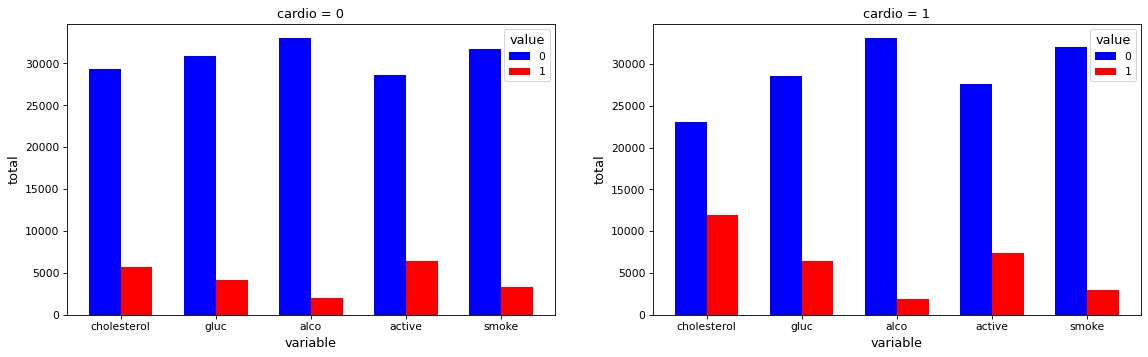

In [ ]:
x_axis = cholesteroldf[0].index
columnnames = ['cholesterol','gluc','alco','active','smoke']
color = ('blue', 'red')
figure(figsize=(18, 5), dpi=77)

#first-plot
plt.subplot(1,2,1)
lineObjects = plt.bar(x_axis,cholesteroldf[0],color = color,width=1)
legend = plt.legend(iter(lineObjects), ('0', '1'))
plt.bar(x_axis+3,glucdf[0],width=1,color=color)
plt.bar(x_axis+6,alcodf[0],width=1,color=color)
plt.bar(x_axis+9,activedf[0],width=1,color=color)
plt.bar(x_axis+12,smokedf[0],width=1,color=color)
plt.xticks([0.5,3.5,6.5,9.5,12.5],columnnames)

plt.xlabel("variable", fontsize=12)
plt.ylabel("total", fontsize=12)

plt.title("cardio = 0")

legend.set_title("value", prop = {'size':12})

#second-plot
plt.subplot(1, 2, 2)
lineObjectsi = plt.bar(x_axis,cholesteroldf[1],color = color,width=1)
legendi = plt.legend(iter(lineObjectsi), ('0', '1'))
plt.bar(x_axis+3,glucdf[1],width=1,color=color)
plt.bar(x_axis+6,alcodf[1],width=1,color=color)
plt.bar(x_axis+9,activedf[1],width=1,color=color)
plt.bar(x_axis+12,smokedf[1],width=1,color=color)
plt.xticks([0.5,3.5,6.5,9.5,12.5],columnnames)

legendi.set_title("value", prop = {'size':12})

plt.xlabel("variable", fontsize=12)
plt.ylabel("total", fontsize=12)

plt.title("cardio = 1")

plt.show()


## Cleaning the data. Filtering out the following patient segments that represent incorrect data:
## - diastolic pressure is higher than systolic (Keeping the correct data with (df['ap_lo'] <= df['ap_hi']))
## -height is less than the 2.5th percentile (Keeping the correct data with (df['height'] >= df['height'].quantile(0.025)))
## -height is more than the 97.5th percenti
## -weight is less than the 2.5th percentile
## -weight is more than the 97.5th percentile

In [ ]:
dfediti = df[df['ap_lo'] <= df['ap_hi']]
dfeditii = dfediti[dfediti['height'] >= dfediti['height'].quantile(0.025)]
dfeditiii =  dfeditii[dfeditii['height'] <= dfeditii['height'].quantile(0.975)]
dfeditiv = dfeditiii[dfeditiii['weight'] >= dfeditiii['weight'].quantile(0.025)]
dfeditv = dfeditiv[dfeditiv['weight'] <= dfeditiv['weight'].quantile(0.975)]
dfeditv

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,1


## Creating a correlation matrix using the dataset. Plotting the correlation matrix using seaborn's heatmap(). Masking the upper triangle. 

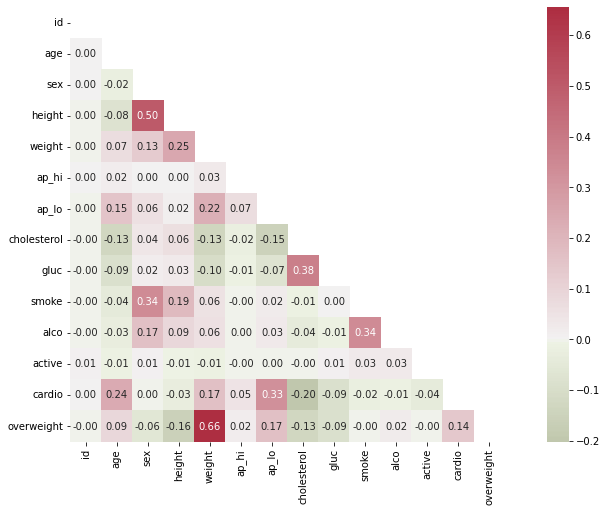

In [ ]:
corrMatrix = dfeditv.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,n=5, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrMatrix, mask=mask,annot=True,center=0,fmt='.2f', square=True,cmap=cmap)
